# Week 3 Mini Project - CNN Cancer Detection
**Name:** SungHak Hong

**Github:** 
## 1. Introduction and Problem Description

In this project, we will explore the Histopathologic Cancer Detection competition dataset from Kaggle. The objective of this competition is to identify metastatic cancer in histopathologic scans of lymph node sections.

The dataset contains over 220,000 histopathologic images of lymph node sections, each labeled as either containing cancerous cells or not. The challenge is to build a deep learning algorithm that can accurately classify these images as containing cancerous cells or not.

In this Jupyter notebook, we will follow the typical data science pipeline to build and evaluate a deep learning model for predicting cancerous cells. This includes performing exploratory data analysis, data preprocessing, model building, model training, and evaluation. We will also discuss the results and provide some concluding remarks.

The dataset and competition details can be found at the following link:

https://www.kaggle.com/c/histopathologic-cancer-detection/overview

## 2. EDA Procedure
### Import Library

In [9]:
import pandas as pd
import numpy as np

import sys
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train = pd.read_csv('C:/Users/vmfl7/Documents/Kaggle/week3/train/_labels.csv')

train.head(10)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
5,acfe80838488fae3c89bd21ade75be5c34e66be7,0
6,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
7,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1
8,559e55a64c9ba828f700e948f6886f4cea919261,0
9,8eaaa7a400aa79d36c2440a4aa101cc14256cda4,0


In [3]:
# Check the dimensions and data types of the DataFrame
print(train.shape)
print(train.dtypes)


(220025, 2)
id       object
label     int64
dtype: object


The shape attribute returns the number of rows and columns of the DataFrame, and the dtypes attribute returns the data type of each column.

In [7]:
# Get a summary of the statistical measures of the numerical features
print(train.describe())

               label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [8]:
# Check for missing values
print(train.isnull().sum())

id       0
label    0
dtype: int64


### Visualizations

<AxesSubplot:>

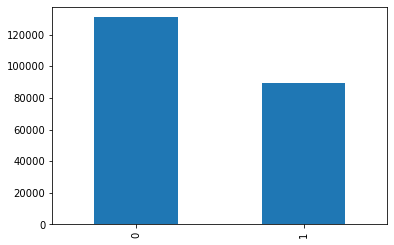

In [4]:
# Visualize the distribution of the target variable
train['label'].value_counts().plot(kind='bar')

Index(['id', 'label'], dtype='object')


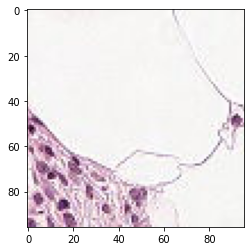

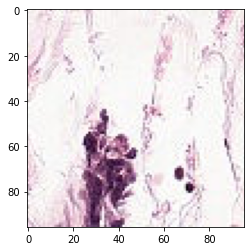

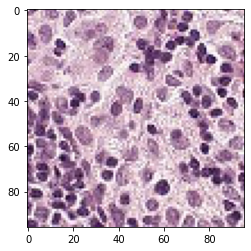

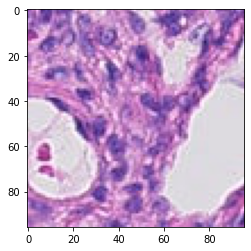

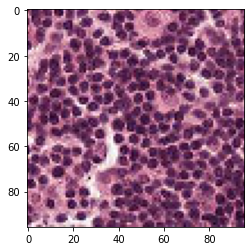

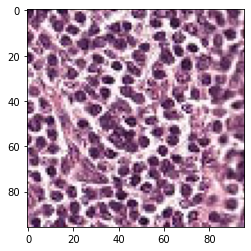

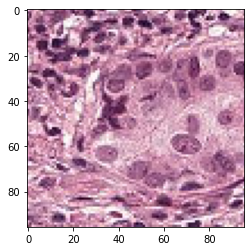

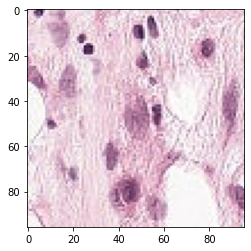

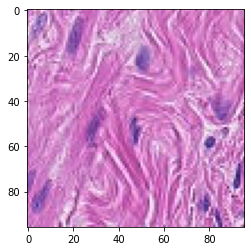

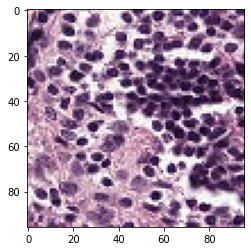

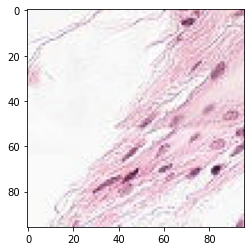

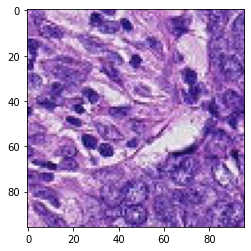

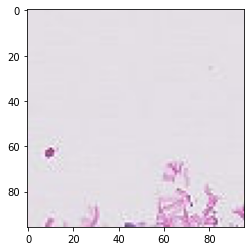

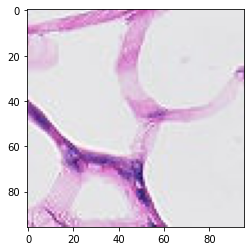

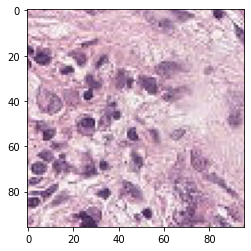

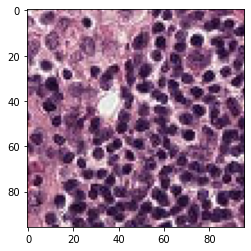

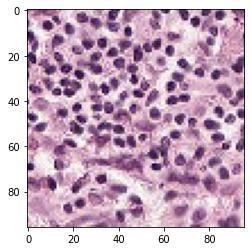

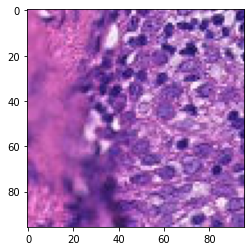

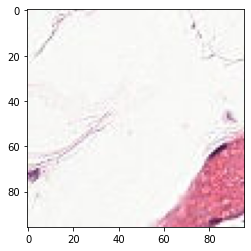

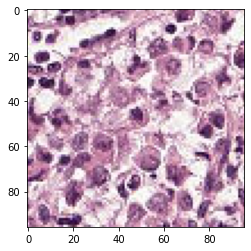

In [7]:
# Visualize the images themselves 
print(train.columns)
import matplotlib.pyplot as plt
import os

for i in range(20):
    img_id = train['id'][i]
    img_path = os.path.join('C:/Users/vmfl7/Documents/Kaggle/week3/train', str(img_id) + '.tif')
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.show()

## CNN structure

In [14]:
# Split dataset into training and validation set
train_data, val_data = train_test_split(train, test_size=0.1, random_state=42, stratify=train['label'])

print(train_data)
print(val_data)

                                              id  label
29031   730b42edf8f14f730fcd9ac98fdc43e45e47a5b9      1
55490   efd3cfafc4a6a99176a9b6cdd69d02b85c8f2be5      0
47145   1182d726342f5e2054ab0926d2eb27f3f9a6d219      1
118906  7ca88efacbe747a6c5a6144b75ae082eb20833ab      1
112294  a44ece5a33090ad2c7b4c9a08b776206d7444fab      0
...                                          ...    ...
21226   70ca5eeee14bc879e1e60aa891bfaf7a12b75719      0
148457  7e9ef776a98cf22c46e9c64057f098b8fb9a73ce      1
17268   ebe8012d370e5b3a4acbefa4fbfbf96bc5bbe00c      0
45844   28e2bfbca2c2697b1bdc7a8ced327481f38cab2a      1
129362  cae879b5f10ba2698519b4f3d122b956eaea6ad7      1

[198022 rows x 2 columns]
                                              id  label
11196   7f55db3d7a309a7685196c60ccf84a2488acdef1      1
65115   a5ac4ed3945cdf5868b2286aeaf4d3103d7aee5b      1
28840   c074437ebb449fac77168383f6fd969aafbd650f      1
75325   05c21a6a6d453f125be1f06d5e88d4ab50a100ee      1
183873  b9b173f1dd7cb

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(96,96,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
